In [ ]:
import pandas as pd

file_path = "/content/Car_Purchasing_Data.csv"
df = pd.read_csv(file_path)

df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


Question 1:
Print a scatterplot with "Annual Salary" as the horizontal axis and "Car Purchase Amount" as vertical axis. Comment with interpretation.

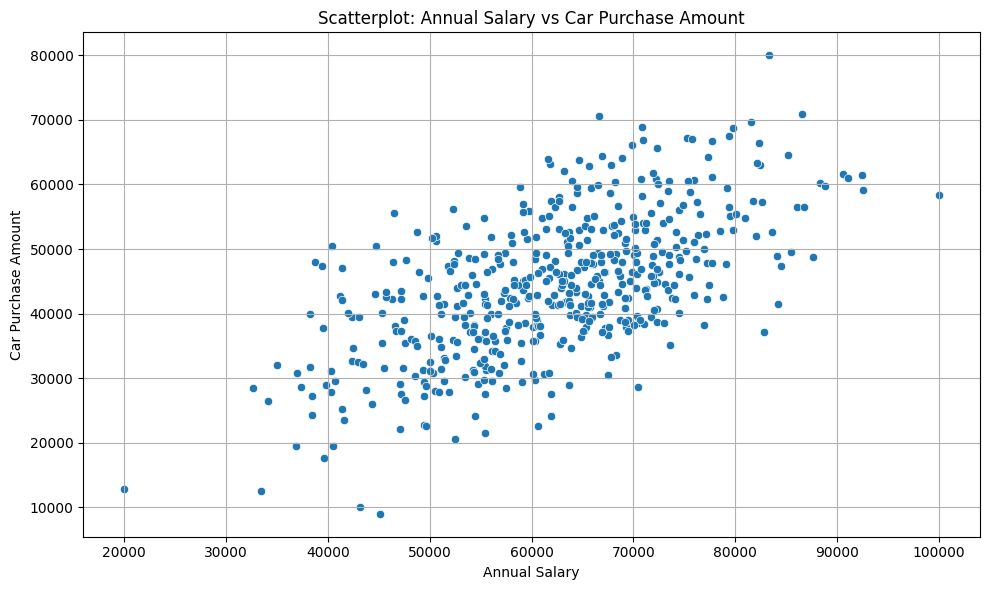

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Salary', y='Car Purchase Amount', data=df)

# Labels and title
plt.xlabel('Annual Salary')
plt.ylabel('Car Purchase Amount')
plt.title('Scatterplot: Annual Salary vs Car Purchase Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


Interpretation of Scatterplot (Q1):
The scatterplot shows a positive linear relationship between Annual Salary and Car Purchase Amount. As the annual salary increases, people tend to spend more on purchasing cars. However, there's also some variance — people with similar salaries may purchase cars at different price points, possibly due to personal preferences or financial planning.

Question 2:
Plot a regression plot with "Car Purchase Amount" as the dependent variable and "Annual Salary" as the independent variable. Interpret the regression line and provide the equation.

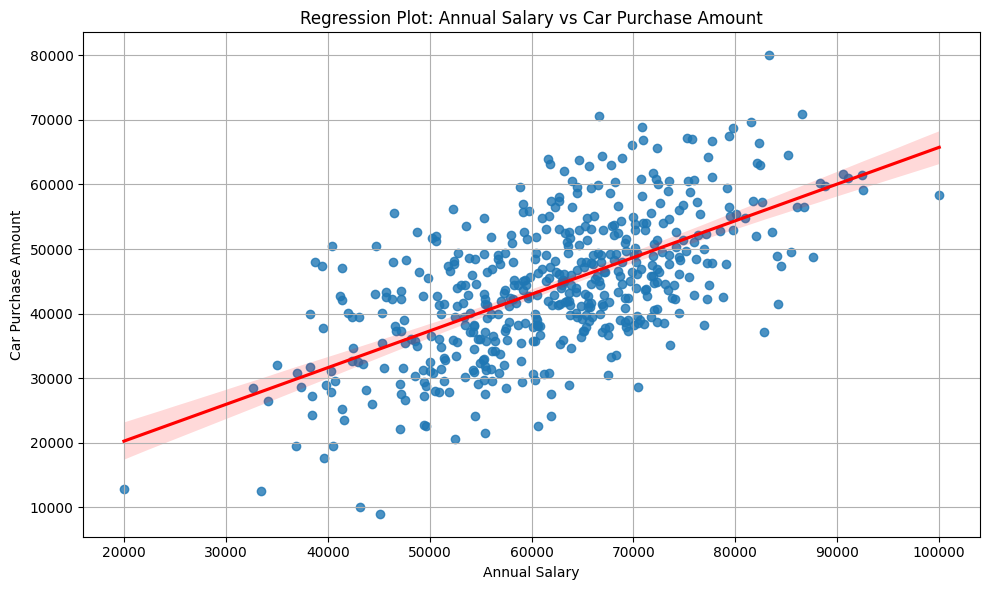

(np.float64(0.568753254916769), np.float64(8874.72947262624))

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Define features and target
X = df[['Annual Salary']]
y = df['Car Purchase Amount']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Regression line equation
slope = model.coef_[0]
intercept = model.intercept_

# Plot regression
plt.figure(figsize=(10, 6))
sns.regplot(x='Annual Salary', y='Car Purchase Amount', data=df, line_kws={'color': 'red'})
plt.title("Regression Plot: Annual Salary vs Car Purchase Amount")
plt.grid(True)
plt.tight_layout()
plt.show()

(slope, intercept)


Regression Plot Interpretation (Q2):
The regression line shows a clear upward trend — confirming a positive linear relationship between Annual Salary and Car Purchase Amount.

🧮 Regression Line Equation:

Car Purchase Amount
=
0.5688
×
Annual Salary
+
8874.73
Car Purchase Amount=0.5688×Annual Salary+8874.73
This means for every 1 unit increase in salary, the car purchase amount increases by approximately 0.57 units, on average.

 Question 3:
What is a cost function? What is the cost function equation for this regression problem? Print the "Sum of Square Error/Residual".

In [ ]:
# Predict the values using the model
y_pred = model.predict(X)

# Calculate Sum of Squared Errors (Residuals)
squared_errors = (y - y_pred) ** 2
sum_squared_error = squared_errors.sum()

sum_squared_error

np.float64(35805541310.34138)

Question 3 Explained:
 What is a Cost Function?
A cost function measures how well a machine learning model is performing. In linear regression, it quantifies the difference between predicted and actual values.



question 4

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import pandas as pd



# Define features and target
X = df[['Annual Salary', 'Age']]
y = df['Car Purchase Amount']

# Create a pipeline with standard scaling and linear regression
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# Perform 5-fold cross-validation
scores = cross_val_score(pipeline, X, y, cv=5)

# Print individual scores and average
print("Fold Accuracy Scores:", scores)
print("Average Accuracy Score:", scores.mean())


Fold Accuracy Scores: [0.85021601 0.77628245 0.67186101 0.74896875 0.82855321]
Average Accuracy Score: 0.7751762849168895


question 5
ans:
Gradient Descent (Batch Gradient Descent)
It calculates the gradient of the cost function using the entire training dataset.

Updates the model parameters after processing all data.

Pros:

Stable convergence

Accurate direction

Cons:

Slow for large datasets

High memory usage

Stochastic Gradient Descent (SGD)
It updates the model parameters using only one training sample at a time.

Parameters are updated much more frequently.

Pros:

Fast and efficient for large datasets

Can escape local minima (due to noise)

Cons:

Noisy updates

May not converge smoothly

Since your dataset has only 500 rows, Batch Gradient Descent (regular gradient descent) is perfectly fine and likely better. It will provide stable and accurate updates without the instability of SGD.

